# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

Along with loading the COVID 19 Dataset (seen above), we downloaded another dataset based off of the 5 year history of Pfizer Inc. stock performance, you can find it here: https://www.nasdaq.com/market-activity/stocks/pfe/historical

**Some questions to answer:**
* How did amount of COVID-19 cases affect Pfizer's stock performance?
* How did COVID Deaths affect Pfizer's stock performance?
* A third question

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

# Reading both csvs
covid = pd.read_csv("owid-covid-data.csv")
pfe = pd.read_csv("PFE.csv")
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153167,ZWE,Africa,Zimbabwe,2022-01-04,217678.0,1591.0,1447.143,5078.0,31.0,19.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
153168,ZWE,Africa,Zimbabwe,2022-01-05,219057.0,1379.0,1644.143,5092.0,14.0,21.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
153169,ZWE,Africa,Zimbabwe,2022-01-06,220178.0,1121.0,1207.143,5108.0,16.0,15.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
153170,ZWE,Africa,Zimbabwe,2022-01-07,221282.0,1104.0,1146.286,5136.0,28.0,18.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


Our goal is to look at the relationship between worldwide daily new cases and deaths due to COVID-19 and the stock performance of Pfizer Inc. Pfizer Inc. was one of main companies behind the development of a COVID-19 vaccine. First we begin by removing extraneous data and combining the total new cases and new deaths for all countries by date below.

In [133]:
# Extract COVID dates
covid["date"] = pd.to_datetime(covid["date"])

covid = covid[covid["iso_code"].str.contains("OWID_") == False]
covid = covid.groupby("date").sum()

We remove all rows from the Pfizer stock performance dataset that contain before the beginning of our COVID-19 data set begins, meaning any rows with dates prior to the beginning of 2020.

In [134]:
# Extract Pfizer Date
pfe["Date"] = pd.to_datetime(pfe["Date"])

pfe.drop(pfe.index[pfe["Date"].apply(lambda x: x.year) < 2020], inplace = True)
pfe.rename(columns = {"Date" : "date"}, inplace = True)

The pricing data within the Pfizer dataset is also a string object not a float, we will fix this below.

In [135]:
pfe[pfe.columns[1:]] = pfe[pfe.columns[1:]].replace('[\$,]', '', regex = True).astype(float)
pfe.set_index("date", inplace=True)

### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

In [136]:
# First, let's look at the COVID dataset.

# A quick look at the dataset's head will show us some of the data
covid.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.9,49.1,87.847,7.98,228.46,2.401,0.0,0.0,0.0,0.000000
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.9,49.1,87.847,7.98,228.46,2.401,0.0,0.0,0.0,0.000000
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.9,49.1,87.847,7.98,228.46,2.401,0.0,0.0,0.0,0.000000
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.8,87.9,178.517,10.08,305.61,3.178,0.0,0.0,0.0,0.000000
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.8,87.9,178.517,10.08,305.61,3.178,98.7,12.3,12.3,7.516748


In [137]:
# Now, we take a look at some of the variable's information
covid.info()

# Looks like (lucky for us), the variable types are floats and they are non-null :D

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 739 entries, 2020-01-01 to 2022-01-08
Data columns (total 62 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   total_cases                                 739 non-null    float64
 1   new_cases                                   739 non-null    float64
 2   new_cases_smoothed                          739 non-null    float64
 3   total_deaths                                739 non-null    float64
 4   new_deaths                                  739 non-null    float64
 5   new_deaths_smoothed                         739 non-null    float64
 6   total_cases_per_million                     739 non-null    float64
 7   new_cases_per_million                       739 non-null    float64
 8   new_cases_smoothed_per_million              739 non-null    float64
 9   total_deaths_per_million                    739 non-null    float64


In [138]:
# Now, looking at a quick description of the data, we can see the counts, averages, and standard deviations.
covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,7.390000e+02,7.390000e+02,7.390000e+02,7.390000e+02,739.000000,739.000000,7.390000e+02,739.000000,739.000000,739.000000,...,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,7.390000e+02,739.000000,739.000000,739.000000
mean,1.042864e+08,4.119822e+05,4.014451e+05,2.278596e+06,7383.330176,7352.596445,4.480576e+06,20711.596954,19870.231920,75699.587704,...,1394.198917,4238.201624,4288.738518,464.462491,14165.976671,122.761271,2.463982e+05,63.203099,113.519202,6034.126760
std,9.406985e+07,3.247242e+05,2.805336e+05,1.832814e+06,3920.182161,3650.114081,4.292460e+06,21964.949636,17179.492021,65769.730667,...,346.574437,1093.273408,1197.516685,117.740532,3822.032155,31.936088,7.261503e+05,176.205932,306.696286,18673.450493
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,27.900000,49.100000,87.847000,7.980000,228.460000,2.401000,-9.681300e+04,-197.820000,-203.460000,-4669.349217
25%,1.118821e+07,1.924430e+05,1.873984e+05,5.545970e+05,5238.000000,5442.147500,4.185421e+05,5023.702500,4968.303500,14320.179000,...,1461.800000,4501.800000,4571.998000,494.078000,14919.290000,130.427000,0.000000e+00,0.000000,0.000000,0.000000
50%,8.593077e+07,4.148860e+05,4.178017e+05,1.915241e+06,7241.000000,7199.005000,3.394441e+06,20153.138000,21550.022000,59469.989000,...,1481.300000,4574.400000,4715.599000,498.178000,15370.280000,133.022000,0.000000e+00,0.000000,0.000000,0.000000
75%,1.856834e+08,5.891885e+05,5.880636e+05,4.008198e+06,9854.500000,9839.145500,7.686998e+06,29071.456500,28781.944000,132620.122000,...,1536.700000,4700.400000,4715.599000,507.478000,15806.340000,135.712000,0.000000e+00,0.000000,0.000000,0.000000
max,3.050276e+08,2.878977e+06,2.109105e+06,5.481776e+06,18053.000000,14696.862000,1.531059e+07,229202.167000,142633.883000,202732.165000,...,1579.700000,4737.300000,4815.599000,519.878000,16083.930000,136.538000,5.228236e+06,1054.590000,1834.440000,133525.774544


In [139]:
# Now, let's look at the Pfizer dataset
pfe.head()

,Close/Last,Volume,Open,High,Low
date,,,,,
2022-02-28,46.94,35296050.0,46.82,47.170,46.340
2022-02-25,47.72,31199190.0,45.81,48.030,45.740
2022-02-24,45.96,44227350.0,45.86,46.755,45.400
2022-02-23,46.87,25792980.0,47.59,48.160,46.780
2022-02-22,47.53,34814810.0,47.54,48.310,47.345


In [140]:
# Now, we take a look at some of the variable's information
pfe.info()

# Looks like (lucky for us), the variable types are MOSTLY floats and all of them are non-null
# There's a datetime object as well, that we will use to merge with the COVID dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 544 entries, 2022-02-28 to 2020-01-02
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  544 non-null    float64
 1   Volume      544 non-null    float64
 2   Open        544 non-null    float64
 3   High        544 non-null    float64
 4   Low         544 non-null    float64
dtypes: float64(5)
memory usage: 25.5 KB


In [141]:
# Now, looking at a quick description of the Pfizer data
pfe.describe()

,Close/Last,Volume,Open,High,Low
count,544.000000,5.440000e+02,544.000000,544.000000,544.000000
mean,39.963389,3.294000e+07,39.983874,40.426099,39.503899
std,6.605819,1.830443e+07,6.576125,6.721746,6.449537
min,27.848200,1.029072e+07,28.112100,28.913600,27.251900
25%,35.685050,2.167379e+07,35.744150,36.114425,35.388150
50%,37.534900,2.795200e+07,37.608200,37.798800,37.191300
75%,42.792500,3.835126e+07,42.752500,43.098750,42.257500
max,61.250000,2.183623e+08,60.600000,61.710000,59.830000


### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

In [142]:
def checkMerge(left, right, final):
    # get labels for the left and right table columns
    leftLabels = next(left.iterrows())[1].axes[0]
    rightLabels = next(right.iterrows())[1].axes[0]
    
    # for each date in the final table compare all column values to ensure they were merged correctly
    for date in final.index:
        for label in leftLabels:
            if final.loc[date][label] != left.loc[date][label]:
                return False
        for label in rightLabels:
            if final.loc[date][label] != right.loc[date][label]:
                return False
    
    return True
        
# merge covid and pfizer tables
merged = pd.merge(covid, pfe, how = "inner", on = "date")
print(checkMerge(covid, pfe, merged))

True


### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 

##### Target Variable:
Close/Last from Pfizer Stock Performance Data

##### Predictor Variables:
* Total Cases
* New Cases
* Total Deaths
* New Deaths
* ICU Patients
* Hospital Patients
* Total Vaccinations
* New Vaccinations

(All from COVID dateset)

#### Heat Map for Correlation Between All Variables

<AxesSubplot:>

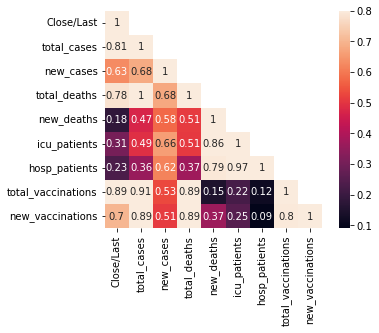

In [143]:
corrMatt = merged[["Close/Last", "total_cases", "new_cases", 
                   "total_deaths", "new_deaths", "icu_patients", 
                   "hosp_patients", "total_vaccinations", "new_vaccinations"]].corr()

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

#### Correlation Between Total COVID Cases and Pfizer Stock Price

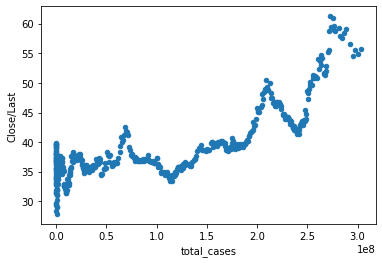

In [145]:
merged.plot(kind = "scatter", x = "total_cases", y = "Close/Last")
plt.show()

#### Correlation Between Daily New COVID Cases and Pfizer Stock Price

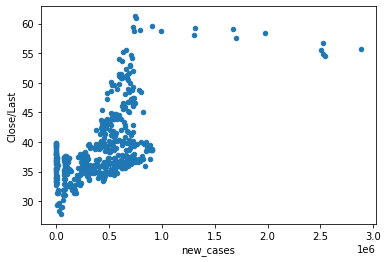

In [146]:
merged.plot(kind = "scatter", x = "new_cases", y = "Close/Last")
plt.show()

#### Correlation Between Total Deaths Due to COVID and Pfizer Stock Price

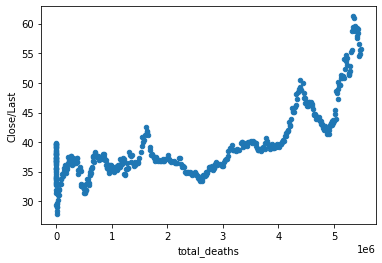

In [147]:
merged.plot(kind = "scatter", x = "total_deaths", y = "Close/Last")
plt.show()

#### Correlation Between New Deaths Due to COVID and Pfizer Stock Price

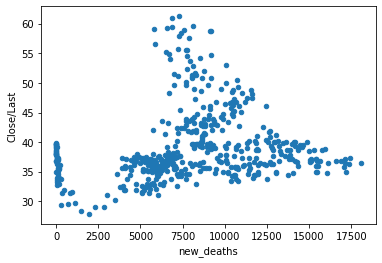

In [148]:
merged.plot(kind = "scatter", x = "new_deaths", y = "Close/Last")
plt.show()

#### Correlation Between Total Daily ICU Patients and Pfizer Stock Price

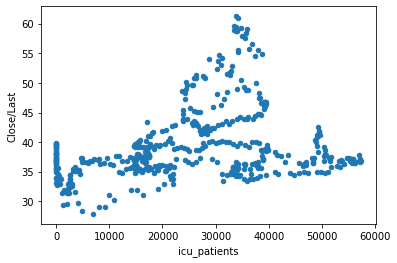

In [151]:
merged.plot(kind = "scatter", x = "icu_patients", y = "Close/Last")
plt.show()

#### Correlation Between Total Daily Hospital Patients and Pfizer Stock Price

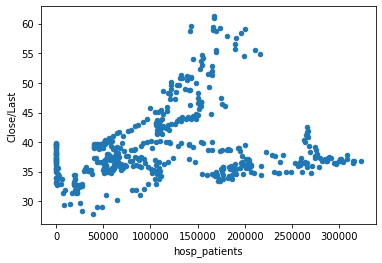

In [152]:
merged.plot(kind = "scatter", x = "hosp_patients", y = "Close/Last")
plt.show()

#### Correlation Between Total Vaccinations Globally and Pfizer Stock Price

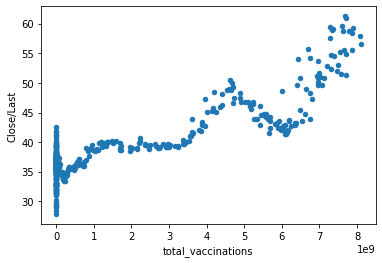

In [153]:
merged.plot(kind = "scatter", x = "total_vaccinations", y = "Close/Last")
plt.show()

#### Correlation Between Daily New Vaccinations and Pfizer Stock Price

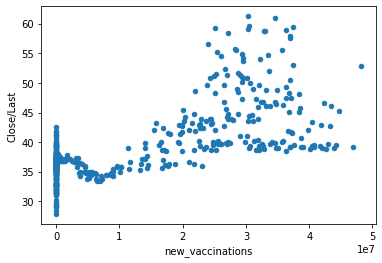

In [154]:
merged.plot(kind = "scatter", x = "new_vaccinations", y = "Close/Last")
plt.show()